# **Investing in Stocks Project Notebook**
## *Buy-and-Hold versus Momentum trading using MPT*

# **Introduction**
In this project, the team investigated investment strategies for stocks based on Modern Portfolio Theory (MPT) and momentum trading (MT) in order to create a portfolio of stocks that appropriately balances the conflicting risk and profit and compare different investment strategies. 

**Project Outline:**

1) *Prepare the Data* - Select three stocks in each of the three sectors; in total, there will be nine stocks. Retrieve real-world data from the web using Python. 
Clean the data (e.g., remove NaNs).

2) *Run Modern Portfolio Theory Assessment* - 
Create and run an optimization model to select optimal portfolio allocations defined by MPT. 
Use plots to show the expected return of your solutions for different risk values. 

3) *Compare Buy/Hold vs Momentum Trading Strategies* - 
Select a portfolio allocation produced by your MPT model consisting of exactly three stocks. The selected stocks and the allocation must be extracted from the solutions obtained from the MPT model.
Implement and test different momentum trading strategies.

4) *Analysis of Strategies When Implemented in 2022* - 
Evaluate the quality of the selected portfolio allocation using the buy-and-hold strategy, the momentum trading strategy, and an indexed investing strategy.
Compare the solutions obtained by both strategies and identify the most profitable, or least costly.

# **1. Select Stocks and Collect / Prepare the Data**
In this section, three stocks will be selected in each of the three assigned sectors (Consumer Staples, Energy, & Financial); in total there will be nine stocks. Real-world stock data will be collected from the web using Python.

## Data Import

##Python packages used in this project

In [1]:
# Before we start, lets get some useful python modules
import numpy as np #Used for numeric functions
import pandas as pd #Used for data analysis
import matplotlib.pyplot as plt #Used to Plot
import seaborn as sns #Used for data Viualization

In [2]:
# And install a few stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 2.5 MB/s 
     |████████████████████████████████| 83 kB 855 kB/s 
     |████████████████████████████████| 50 kB 1.9 MB/s 
     |████████████████████████████████| 106 kB 52.5 MB/s 
     |████████████████████████████████| 127 kB 24.2 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=2a1a07d67a480c72adc20a011aa421e64df80578059e06dfc323082f90cae0ab
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=e4f277c2cabd768071aad9c0d7367b95ab7805624fe9fa481b55d171c40bde30
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built parse sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation:

### Stocks associated with the ticker symbols: (WMB)- The Williams Companies, (XOM)- Exxon Mobile, (HES)- Hess Corporation, (JPM)- J.P. Morgan, (BLK)- BlackRock, (MS)- Morgan Stanly, (CPB)- The Campbel Soup Company, (KO)- Coca Cola, (CLX)- The Clorox Company

In [3]:
# Stock ticker list defined below  
tickers_list = ['WMB','XOM','HES','JPM','BLK','MS','CPB','KO','CLX']
# pull historical price data for each stock to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

## This section shows a summary of the stock data for all nine stocks with dow_prices

In [4]:
# let's extract just the data we need (adjclose)
# This code collects the adjclose prices
prep_data = pd.DataFrame(dow_prices['WMB']['adjclose']).rename(columns = {"adjclose":"WMB"})
# combine all the tickers
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])


In [5]:
# Checking data to make sure row and columns are consistent for all nine stocks
prep_data.shape

(1258, 9)

### Data Cleaning 



In [6]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list[0:]:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,WMB,XOM,HES,JPM,BLK,MS,CPB,KO,CLX
2017-01-04,-0.003179,-0.011002,-0.014167,0.001844,0.000595,0.013240,0.006926,-0.003588,0.007520
2017-01-05,0.012117,-0.014907,0.002745,-0.009205,-0.010655,-0.009170,-0.002129,0.002401,0.006315
2017-01-06,0.021424,-0.000565,-0.003220,0.000116,0.004601,0.014577,-0.003775,-0.000240,-0.001467
2017-01-09,-0.015114,-0.016497,-0.020840,0.000697,-0.010096,-0.025998,-0.009942,-0.010062,-0.009957
2017-01-10,-0.107423,-0.012753,0.013859,0.002901,-0.000289,0.008195,0.004351,-0.006777,-0.015828
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.006620,0.000492,-0.008366,0.003574,0.002611,0.010580,-0.000238,0.000688,-0.005505
2021-12-27,0.015861,0.014258,0.028848,0.005723,0.009465,0.010670,0.005243,0.007386,0.006241
2021-12-28,-0.003808,-0.003232,-0.004365,0.003035,-0.000813,-0.004283,0.027975,0.003922,0.006086
2021-12-29,-0.004587,-0.008753,-0.008103,-0.000504,-0.013126,-0.012404,-0.003229,0.001189,-0.003199


In [7]:
return_data.shape

(1257, 9)

## Visualize the Data



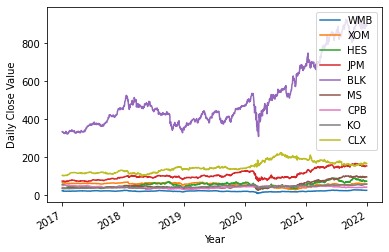

In [8]:
# Data Collection - All 9 Stocks, Daily Closing Value over Time to see what the data looks like
prep_data.plot()
plt.xlabel('Year')
plt.ylabel('Daily Close Value')
plt.show() 

### Energy Sector Stock Selection and Data Discussion

Three stocks were selected from the S&P 500 energy sector, they include:

1.   **The Williams Companies (WMB)** - The Williams Companies, Inc., is an American energy company based in Tulsa, Oklahoma. Its core business is natural gas processing and transportation, with additional petroleum and electricity generation assets.  WMB was selected for its reduced volatility and steady growth compared to the rest of the energy sector.

2.   **Exxon Mobil (XOM)** - ExxonMobil Corporation is an American multinational oil and gas corporation.  XOM was selected as a mainstream sector option.

3.   **Hess Corporation (HES)** - Hess Corporation is an American global independent energy company involved in the exploration and production of crude oil and natural gas. Hess Corporation was the leader in the sector for growth from 2017 to 2021, but also had the largest volatility of the bunch.

The overall energy sector appears stagnant from 2017 thru 2019, although with some volatility.  All three stocks were affected negatively by the COVID-19 pandemic in 2020.  All have some recovery through the end of 2021 but some volatility remains since the pandemic. 

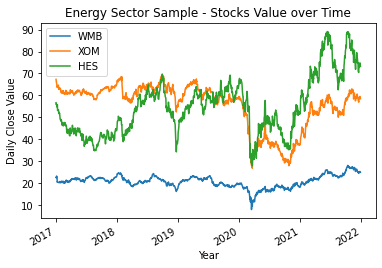

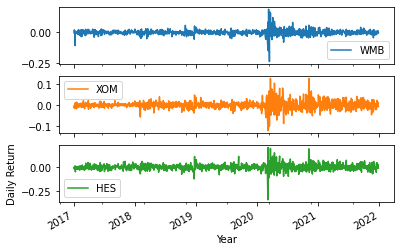

In [9]:
prep_data_energy = prep_data[['WMB','XOM','HES']]# this pull the columns 
prep_data_energy.plot() #Plot of the three Energy stocks 
plt.title('Energy Sector Sample - Stocks Value over Time')
plt.xlabel('Year')
plt.ylabel('Daily Close Value')
plt.show() #Shows the graph 

return_data_energy = return_data[['WMB','XOM','HES']]# this pull the columns 
return_data_energy.plot(subplots=True)# the individual subplot of each stock 
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.show() #Shows the graph

### Financial Sector Stock Selection and Data Discussion


Three stocks were selected from the S&P 500 financial sector, they include:

1.   **JPMorgan Chase & Co. (JPM)** - JPMorgan Chase is an American holding company headquartered in New York City, and an industry leader in investment banking and financial services across the globe. They are one of the largest global banks, one of the oldest institutions full of rich history, and consistently appear within the top 100 of the Fortune 500. Due to their history and market position; they were chosen as a low volatile, consistent performer for the portfolio. Their consistency, low risk, and steady growth provide peace of mind to investors who want to add riskier stocks to their portfolios.

2.   **Morgan Stanley (MS)** -  Morgan Stanley is a global investment management and financial services company, headquartered in New York City. Founded by former J.P. Morgan partners, Morgan Stanley is one of the largest U.S. corporations by total revenue and like JPM, consistently appear within the top 100 of the Fortune 500. Morgan Stanley was chosen for their consistent, excellent reputation and low volatility within the market. A lower risk stock to offset higher risk ones.

3.   **BlackRock, Inc. (BLK)** -  BlackRock was founded in 1988 and has grown from a small start up to a global investment leader. Based in New York City and in a relative short amount of time, BlackRock is the world's largest asset manager ($ trillions). Due to their size, BlackRock is a top shareholder in many major public companies, such as Apple and Microsoft. They are also top shareholders in the two financial companies mentioned above (JPM & MS). BlackRock was selected as our "Tesla stock" because of their quick rise and heavy influence in the market. They were also chosen to be the financial sector stock with the most risk/reward volatility and BlackRock is the most volatile stock of the three chosen.

The financial sector, like most industries and sectors, took a huge negative hit during the COVID-19 pandemic. From 2017 up to the pandemic, the financial sector was steady for the most part, with little volatility (excluding the crypto market). Post COVID-19, the financial sector continues to improve and return to pre-pandemic conditions, as well as upward improvement (also, excluding the crypto market). Future growth in the financial sector appears prominant and continuous, as it has in the past. For the most part, financial sector investing is beneficial in the long-term and can overcome situations like COVID-19 because markets tend to return to normal in the long run.

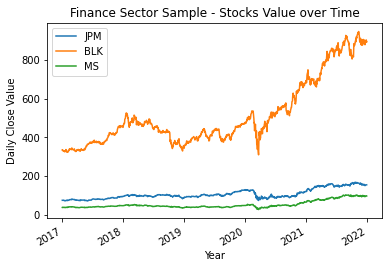

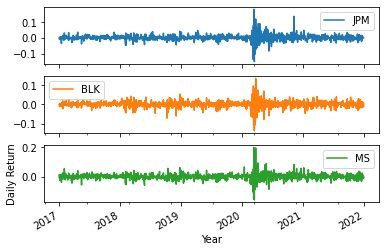

In [10]:
prep_data_finance = prep_data[['JPM','BLK','MS']] # this pull the columns 
prep_data_finance.plot() #Plot of the three Finance stocks 
plt.title('Finance Sector Sample - Stocks Value over Time')
plt.xlabel('Year')
plt.ylabel('Daily Close Value')
plt.show() #Shows the graph

return_data_finance = return_data[['JPM','BLK','MS']] # this pull the columns 
return_data_finance.plot(subplots=True)# the individual subplot of each stock 
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.show()#Shows the graph

### Consumer Staple Stock Selection and Data Discussion

Three stocks were selected from the S&P 500 consumer staple sector, they include:

1.   **Coca-Cola Co. (KO)** - Coca-Cola (Coke) is a popular product and the company has been around for decades, which means the stock would be more stable than many other companies.

2.   **Campbell Soup Company (CPB)** -  One of the largest American based processed foods and snack company in the U.S., which has been a consistent performer. Steady growth in EPS and dividends paid make this stock very appealing to investors.

3.   **Clorox Co. (CLX)** -  A global consumer products manufacturer, based in Oakland, CA that was chosen as being a company that was significantly impacted by the COVID-19 pandemic. 



In the advent of the recent COVID-19 pandemic, the stock market saw drastic shifts and changes that we wanted to capture. We wanted to see how those shifts affected Coke, Campbell's and Clorox. Specifically, the correlation and covariance between them. What we discovered is that Campbell's and Clorox have a strong correlation and positive covariance with each other, which mean they grow together. However, even though Coca-Cola has positive covariance with the other two stocks; the correlation is weak.

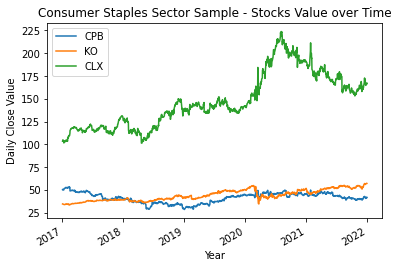

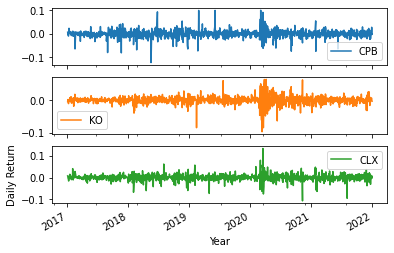

In [11]:
prep_data_consume = prep_data[['CPB','KO','CLX']] # this pull the columns
prep_data_consume.plot() #Plot of the three Consumer Staples stocks 
plt.title('Consumer Staples Sector Sample - Stocks Value over Time')
plt.xlabel('Year')
plt.ylabel('Daily Close Value')
plt.show() #Shows the graph

return_data_consume = return_data[['CPB','KO','CLX']]# this pull the columns
return_data_consume.plot(subplots=True)# the individual subplot of each stock 
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.show()#Shows the graph

### Average Return of Each Stock from 2017 through 2021

In [12]:
Avg_Return = pd.DataFrame(np.mean(prep_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(prep_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

     Avg_Return
WMB   20.722145
XOM   55.566482
HES   54.916310
JPM  105.494519
BLK  514.988515
MS    51.200206
CPB   41.228457
KO    43.968475
CLX  147.649815
     Std_Dev_Return
WMB        2.786713
XOM       10.144570
HES       13.032081
JPM       25.379406
BLK      171.482863
MS        18.874632
CPB        5.420291
KO         5.960247
CLX       29.984941


In [13]:
daily_return = pd.DataFrame(prep_data.pct_change(1))
daily_return.dropna(inplace=True)
#daily_return

In [14]:
# Confirming Data Integrity
daily_return.isnull().sum()

WMB    0
XOM    0
HES    0
JPM    0
BLK    0
MS     0
CPB    0
KO     0
CLX    0
dtype: int64

## Data Review

In this section, an optimization model will be created and run, in order to select optimal portfolio allocations.

The data will then be plotted to show the expected return over a range of risk values.

In [15]:
# This section of code installs pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 11.1 MB 4.1 MB/s 
     |████████████████████████████████| 49 kB 2.8 MB/s 


### Covariance Matrix

The covariance matrix is integral to our stock selection process as we can see how the stock behaves in relation to each other as a pair. When we have a positive covariance both those stocks grow together while the opposite is true, a negative covariance shows us which pair goes down at the same time this is a prelude to our correlations matrix.

In [16]:
# here's the covariance matrix
Covariance_matrix = daily_return.cov()
Covariance_matrix

,WMB,XOM,HES,JPM,BLK,MS,CPB,KO,CLX
WMB,0.000487,0.000270,0.000414,0.000248,0.000185,0.000265,0.000039,0.000096,0.000009
XOM,0.000270,0.000367,0.000453,0.000243,0.000188,0.000262,0.000030,0.000119,0.000006
HES,0.000414,0.000453,0.000959,0.000345,0.000256,0.000367,0.000034,0.000137,-0.000019
JPM,0.000248,0.000243,0.000345,0.000359,0.000238,0.000349,0.000039,0.000128,0.000009
BLK,0.000185,0.000188,0.000256,0.000238,0.000328,0.000277,0.000050,0.000122,0.000045
MS,0.000265,0.000262,0.000367,0.000349,0.000277,0.000454,0.000045,0.000131,0.000019
CPB,0.000039,0.000030,0.000034,0.000039,0.000050,0.000045,0.000286,0.000062,0.000110
KO,0.000096,0.000119,0.000137,0.000128,0.000122,0.000131,0.000062,0.000161,0.000054
CLX,0.000009,0.000006,-0.000019,0.000009,0.000045,0.000019,0.000110,0.000054,0.000220


### Correlation Matrix 

Unlike our covariance matrix that shows growth and decay patterns. The correlation matrix shows us the relationship between a pair of stocks. When there is positive correlation it means that a particular stock is growing other is growing as well. Alternatively when we have a negative correlation it mean when a particular stock is growing the other is decaying or losing vice versa. This is an important attribute for a portfolio as it creates a balance and it is a form of risk mitigation.

In [17]:
# Correlation Matrix 
Corr_matrix = daily_return.corr()
Corr_matrix

,WMB,XOM,HES,JPM,BLK,MS,CPB,KO,CLX
WMB,1.000000,0.639101,0.605312,0.592752,0.462031,0.564139,0.104041,0.341327,0.027641
XOM,0.639101,1.000000,0.764454,0.670210,0.542647,0.643276,0.091926,0.489486,0.019818
HES,0.605312,0.764454,1.000000,0.587803,0.457203,0.555928,0.064614,0.349159,-0.041441
JPM,0.592752,0.670210,0.587803,1.000000,0.693214,0.865085,0.122632,0.531651,0.030321
BLK,0.462031,0.542647,0.457203,0.693214,1.000000,0.718646,0.164397,0.531178,0.167691
MS,0.564139,0.643276,0.555928,0.865085,0.718646,1.000000,0.124354,0.486209,0.060417
CPB,0.104041,0.091926,0.064614,0.122632,0.164397,0.124354,1.000000,0.289901,0.437595
KO,0.341327,0.489486,0.349159,0.531651,0.531178,0.486209,0.289901,1.000000,0.288141
CLX,0.027641,0.019818,-0.041441,0.030321,0.167691,0.060417,0.437595,0.288141,1.000000


In [18]:
# creating covariance table on stock return dataframe
df_cov = daily_return.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = daily_return.mean()
print('Average Daily Return:')
print(df_return)

Covariance Matrix:
          WMB       XOM       HES       JPM       BLK        MS       CPB  \
WMB  0.000487  0.000270  0.000414  0.000248  0.000185  0.000265  0.000039   
XOM  0.000270  0.000367  0.000453  0.000243  0.000188  0.000262  0.000030   
HES  0.000414  0.000453  0.000959  0.000345  0.000256  0.000367  0.000034   
JPM  0.000248  0.000243  0.000345  0.000359  0.000238  0.000349  0.000039   
BLK  0.000185  0.000188  0.000256  0.000238  0.000328  0.000277  0.000050   
MS   0.000265  0.000262  0.000367  0.000349  0.000277  0.000454  0.000045   
CPB  0.000039  0.000030  0.000034  0.000039  0.000050  0.000045  0.000286   
KO   0.000096  0.000119  0.000137  0.000128  0.000122  0.000131  0.000062   
CLX  0.000009  0.000006 -0.000019  0.000009  0.000045  0.000019  0.000110   

           KO       CLX  
WMB  0.000096  0.000009  
XOM  0.000119  0.000006  
HES  0.000137 -0.000019  
JPM  0.000128  0.000009  
BLK  0.000122  0.000045  
MS   0.000131  0.000019  
CPB  0.000062  0.000110  
KO

# **2. Optimize Portfolio Risk using Modern Portfolio Theory Model**

PLACEHOLDER - Setup the section (i.e. Discuss variables, objective function, and contraint considerations for the model)

## Define Model

In [19]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# Each of the stocks variables defined (The William Company, Exxon, Hess, JP Morgan, BlackRock, Morgan Stanley, Campbell Soup Company, Coca-Cola and Clorox)
m.WMB = Var(within=NonNegativeReals, bounds=(0,1))
m.XOM = Var(within=NonNegativeReals, bounds=(0,1))
m.HES = Var(within=NonNegativeReals, bounds=(0,1))
m.JPM = Var(within=NonNegativeReals, bounds=(0,1))
m.BLK = Var(within=NonNegativeReals, bounds=(0,1))
m.MS  = Var(within=NonNegativeReals, bounds=(0,1))
m.CPB = Var(within=NonNegativeReals, bounds=(0,1))
m.KO  = Var(within=NonNegativeReals, bounds=(0,1))
m.CLX = Var(within=NonNegativeReals, bounds=(0,1))


Now we specify the objective function; to maximize our returns - make as much money as possible! 
Note: We are specifying the fraction/proportion we are investing in each stock multiplied by its average return. We also specify constraints.

The amount invested in the portfolio sums to '1' or 100%, regardless of how much money you start with.   


Your risk must be below a certain level (your 'risk ceiling'). We will set a maximum risk of 0.0005 (so that you are more likely to make money at low risk... if your risk is high, you will just dump all of your money in one stock - the one that makes the most money on average but may have high volatility!) RISK for our definition, is simply the covariance matrix TIMES the 'proportion invested'.  The 'proportion invested' is the allocation amount - your decision variable. So, there is a relationship between the risk and the allocation in different stocks.
And as you will see, we will iteratively try to identify which mix of stocks gives us the max return for a given risk level. As the investor, you can choose which risk level makes sense for you - and you can be confident that you are optimally allocating your portfolio for that given risk level.

In [20]:
# declare objective
m.objective = Objective(expr =               
                        m.WMB*df_return[0] + 
                        m.XOM*df_return[1] + 
                        m.HES*df_return[2] +
                        m.JPM*df_return[3] +
                        m.BLK*df_return[4] +
                        m.MS*df_return[5] +
                        m.CPB*df_return[6] +
                        m.KO*df_return[7] +
                        m.CLX*df_return[8],
                        sense = maximize) # we want to MAX our returns!

# Declare Constraints
# Constraint # 1 - Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.WMB + m.XOM + m.HES + m.JPM + m.BLK + m.MS + m.CPB + m.KO + m.CLX == 1)

# Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.WMB + m.XOM + m.HES + m.JPM + m.BLK + m.MS + m.CPB + m.KO + m.CLX >= 0.0)


### Risk Calculation and Assumptions

PLACEHOLDER - Setup the section

In [21]:
# Creating calculations table for calculate the risk
# Calculate risk
def calc_risk(m):
  variables = m.WMB, m.XOM, m.HES, m.JPM, m.BLK, m.MS, m.CPB, m.KO, m.CLX 
  tickers = ['WMB','XOM','HES','JPM','BLK','MS','CPB','KO','CLX']
  risk_exp = 0 #initial risk value that changes as a result of the loops
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# This expression will compute the risk
expr_risk = calc_risk(m)

# Assuming max risk to be less than 0.01
max_risk = 0.00048

# Sequence of risk levels
risk_limits = np.arange(0.0001, max_risk, 0.000002) # take tiny steps
print (risk_limits)
print("\n Number of risk elements",len (risk_limits))

[0.0001   0.000102 0.000104 0.000106 0.000108 0.00011  0.000112 0.000114
 0.000116 0.000118 0.00012  0.000122 0.000124 0.000126 0.000128 0.00013
 0.000132 0.000134 0.000136 0.000138 0.00014  0.000142 0.000144 0.000146
 0.000148 0.00015  0.000152 0.000154 0.000156 0.000158 0.00016  0.000162
 0.000164 0.000166 0.000168 0.00017  0.000172 0.000174 0.000176 0.000178
 0.00018  0.000182 0.000184 0.000186 0.000188 0.00019  0.000192 0.000194
 0.000196 0.000198 0.0002   0.000202 0.000204 0.000206 0.000208 0.00021
 0.000212 0.000214 0.000216 0.000218 0.00022  0.000222 0.000224 0.000226
 0.000228 0.00023  0.000232 0.000234 0.000236 0.000238 0.00024  0.000242
 0.000244 0.000246 0.000248 0.00025  0.000252 0.000254 0.000256 0.000258
 0.00026  0.000262 0.000264 0.000266 0.000268 0.00027  0.000272 0.000274
 0.000276 0.000278 0.00028  0.000282 0.000284 0.000286 0.000288 0.00029
 0.000292 0.000294 0.000296 0.000298 0.0003   0.000302 0.000304 0.000306
 0.000308 0.00031  0.000312 0.000314 0.000316 0.000318

### Model Solver Section
PLACEHOLDER - Setup section (if needed)

In [22]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.WMB(), m.XOM(), m.HES(), m.JPM() , m.BLK() , m.MS() , m.CPB() , m.KO() , m.CLX()]
  
  # store our returns
  returns[r] =  m.WMB()*df_return[0] + m.XOM()*df_return[1] + m.HES()*df_return[2] + m.JPM()*df_return[3] + m.BLK()*df_return[4] + m.MS()*df_return[5] + m.CPB()*df_return[6] + m.KO()*df_return[7] + m.CLX()*df_return[8] 


  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 4.062770843505859
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of sol

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0633387565612793
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# -------------------------

In [23]:
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['WMB','XOM','HES','JPM','BLK','MS','CPB','KO','CLX']
# param_analysis

# MPT Model Results
### Stock Allocation 
### The graph below is used for our stock selection based on the agreed upon risk of 0.000182


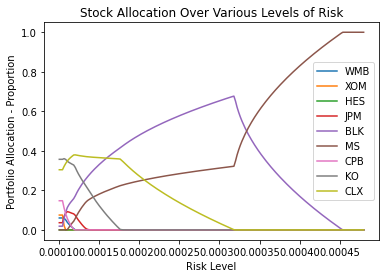

In [24]:
# generating the data frame for proportions of the portfolio for each risk limit
#param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
# Check of portfolio allocation versus risk data

param_analysis.columns = ['WMB','XOM','HES','JPM','BLK','MS','CPB','KO','CLX']
param_analysis.plot()# this plot the stock vs risk 
plt.title('Stock Allocation Over Various Levels of Risk')
plt.xlabel('Risk Level')
plt.ylabel('Portfolio Allocation - Proportion')
plt.show() #Show plot  

#The Plot of the Effeciency Frontier

[0.0001, 0.000102, 0.000104, 0.00010599999999999999, 0.00010799999999999998, 0.00010999999999999998, 0.00011199999999999997, 0.00011399999999999997, 0.00011599999999999996, 0.00011799999999999995, 0.00011999999999999995, 0.00012199999999999994, 0.00012399999999999992, 0.00012599999999999992, 0.0001279999999999999, 0.0001299999999999999, 0.0001319999999999999, 0.0001339999999999999, 0.0001359999999999999, 0.00013799999999999988, 0.00013999999999999988, 0.00014199999999999987, 0.00014399999999999987, 0.00014599999999999986, 0.00014799999999999986, 0.00014999999999999985, 0.00015199999999999985, 0.00015399999999999984, 0.00015599999999999983, 0.00015799999999999983, 0.00015999999999999982, 0.00016199999999999982, 0.0001639999999999998, 0.0001659999999999998, 0.0001679999999999998, 0.0001699999999999998, 0.0001719999999999998, 0.00017399999999999978, 0.00017599999999999978, 0.00017799999999999977, 0.00017999999999999977, 0.00018199999999999976, 0.00018399999999999976, 0.0001859999999999997

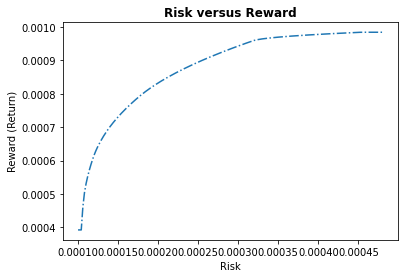

In [25]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

# plot! pylab makes it easy
from pylab import *
plt.plot(risk, reward, '-.')#Note the return is a reserved word in python therefore reward is used instead of return
plt.title('Risk versus Reward',fontweight ='bold', fontsize = 12)
plt.xlabel('Risk')
plt.ylabel('Reward (Return)')
plt.show()#Show risk and reward(reture)


### This section will characterize risk level  versus reward for various portfolio combinations.  The output will be to select a balanced risk and reward profile that maximizes returns of three selected stocks.






In [26]:
param_analysis['Avg Daily Return'] = reward

### Risk vs Reward Discussion

The portfolio was constrained to exactly 3 stocks and the team goal was to create a portfolio that balanced risk and reward. This ultimately limited the range of possible solutions to be roughly between 0.00018 and 0.00030 (refer to 'risk_cat' table below.  The team decided the lower end of this range at a risk level of 0.000182, located on the knee of the risk vs reward curve above.  This is an ideal balance of risk and reward.

In [27]:
# Defines the portfolio allocations for the selected risk range 
risk_cat = param_analysis.iloc[[36,41,71,101]]
risk_cat

,WMB,XOM,HES,JPM,BLK,MS,CPB,KO,CLX,Avg Daily Return
0.000172,0.000008,0.000004,0.000021,0.000059,0.403662,0.217917,0.000007,0.018199,0.360123,0.000783
0.000182,0.000008,0.000004,0.000018,0.000045,0.433223,0.230614,0.000006,0.000153,0.335929,0.000803
0.000242,0.000008,0.000004,0.000039,0.000067,0.563948,0.279330,0.000006,0.000067,0.156530,0.000886
0.000302,0.000006,0.000004,0.000011,0.000021,0.655864,0.313694,0.000005,0.000017,0.030379,0.000945


In [28]:
# Test Scenario to Gauge Returns at Each Risk Level
# Assumed one year and an initial investment of $100k

return_per_risk_cat = risk_cat['Avg Daily Return'] * 1257/5 *100000
return_per_risk_cat

0.000172    19681.495440
0.000182    20181.373570
0.000242    22280.315076
0.000302    23756.901979
Name: Avg Daily Return, dtype: float64

# **3. Momentum Trading Strategy** 


PLACEHOLDER - Discuss hand off from MPT stock optimization to Momentum Trading section (i.e. analysis bounds... # of stocks, durations, etc. from project description)

#### Get_data function
This function goes through the tickers list and downloads the data from yahoo api. Also, we are keeping the closing value and dropping all the rest of the columns. 

In [29]:
# Function to return the data for given tickers and intervals 
def Get_data(ticker1, ticker2, ticker3, startDate, endDate, time_interval):#Values that will be place in the function 
  tickers_list = [ticker1, ticker2, ticker3] #
  dow_prices = {ticker : si.get_data(ticker,start_date = startDate, end_date=endDate, interval=time_interval) for ticker in tickers_list}
  prep_data = pd.DataFrame(dow_prices[ticker1]['close']).rename(columns = {'close':ticker1})#Create the prep_data dataframe
  for i in tickers_list[1:]:
    prep_data[i] = pd.DataFrame(dow_prices[i]['close'])
  return prep_data # the prices 

### Prep the data 

In [30]:
# Assign the ticker list that we want to scrap
tickers_list = ['CLX','BLK','MS']
allocation_list = [0.3362, 0.4332, 0.2306]
# pull historical price data for each stocks to match with our news score later
# Draw out monthly data from Jan 2022 - December 2022 for Buy and hold strategy 
prep_data = Get_data(tickers_list[0], tickers_list[1], tickers_list[2], '01/01/2022', '11/02/2022', '1d')

In [31]:
prep_data

,CLX,BLK,MS
2022-01-03,174.929993,911.729980,100.190002
2022-01-04,175.589996,917.219971,104.260002
2022-01-05,177.429993,891.770020,101.680000
2022-01-06,178.539993,895.489990,103.419998
2022-01-07,179.899994,892.270020,104.050003
...,...,...,...
2022-10-26,141.470001,637.799988,80.910004
2022-10-27,143.059998,648.979980,80.690002
2022-10-28,148.139999,663.750000,82.220001
2022-10-31,146.039993,645.909973,82.169998


In [32]:
prep_data.isnull().sum()
# There are no nulls, we're good to go!

CLX    0
BLK    0
MS     0
dtype: int64

### Visualize the time series

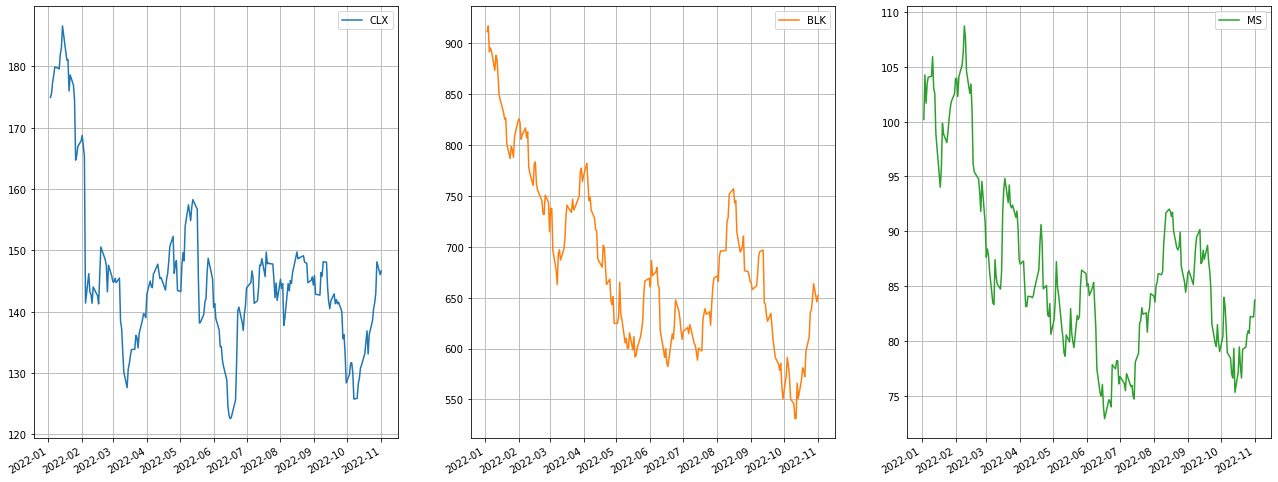

In [33]:

prep_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(30,30))
plt.show() # the subpots of the stock for every month from Jan-Nov

### Prepare the data for individual stocks

#### Add a shift of one day to prevent data leakage
As you see at the end YouTube video, if you don't do the shift, you have data leakage on tomorrow's price! You can get a model that looks AMAZING by leaking data - but it won't be amazing when that model does not validate in the real-world.

* `jpm['Close'].rolling(9).mean()` includes the 9th day.
* `jpm['Close'].rolling(9).mean().shift()` uses the previous 9 day moving average to make its decision for tomorrow's trading day

In [34]:
tickers_list = ['CLX','BLK','MS'] # Stock Chosen by our model
allocation_list = [0.3362, 0.4332, 0.2306]
prep_data = Get_data(tickers_list[0], tickers_list[1], tickers_list[2], '01/01/2017', '12/31/2021', '1d')# the price of each stock at the beginning of each month from Jan-Nov

In [35]:
prep_data

,CLX,BLK,MS
2017-01-03,121.019997,386.429993,43.049999
2017-01-04,121.930000,386.660004,43.619999
2017-01-05,122.699997,382.540009,43.220001
2017-01-06,122.519997,384.299988,43.849998
2017-01-09,121.300003,380.420013,42.709999
...,...,...,...
2021-12-23,169.830002,913.919983,99.339996
2021-12-27,170.889999,922.570007,100.400002
2021-12-28,171.929993,921.820007,99.970001
2021-12-29,171.380005,909.719971,98.730003


#### Visualize the Data

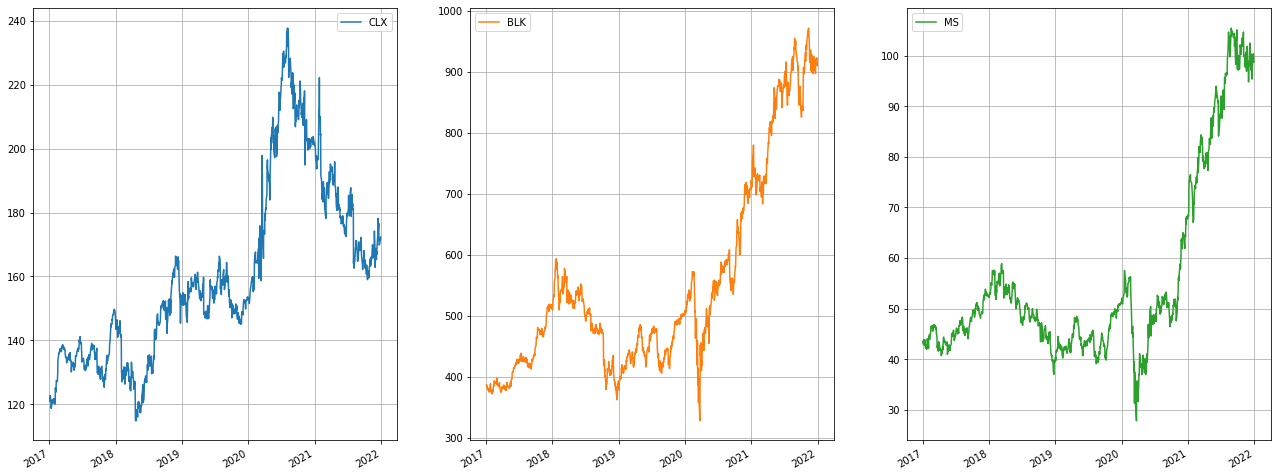

In [36]:
prep_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(30,30))
plt.show() # the subplots of the stock for every month from Jan-Nov

#### Prep the data for individual stocks 

In [37]:
day = np.arange(1, len(prep_data) + 1) #generate list of trading days
print(len(day))
prep_data['Day'] = day

1258


#### Get Over all return function
This function takes in the prep data which is a data frame with three closing values corresponding to three stocks. 
- Then we separate them to three stock's data frame 
- Add lowerVal and upperVal columns 
- Add 'logClose' column so we can calculate the return using sum of differences 
- Add invested column {1: when lowerVal is more then upperVal, 0 otherwise}
- Then add system return as a product of 'invested' and 'return'.
- Calculate the system_return and return the same. 

In [38]:
def get_overall_return(prep_data, mlowerVal, mupperVal):
  stock1 = prep_data[['Day', tickers_list[0]]].rename(columns = {tickers_list[0]: 'Close'})
  stock2 = prep_data[['Day', tickers_list[1]]].rename(columns = {tickers_list[1]: 'Close'})
  stock3 = prep_data[['Day', tickers_list[2]]].rename(columns = {tickers_list[2]: 'Close'})

  # rolled back (no data leakage) 
  # since this cell is run after, this overwrites the previous data leakage
  # you can comment out the cell above and run all if you are nervous!
  lowerVal = mlowerVal
  upperVal = mupperVal
  stock1['lowerVal'] = stock1['Close'].rolling(lowerVal).mean().shift()
  stock1['upperVal'] = stock1['Close'].rolling(upperVal).mean().shift()
  stock1.dropna(inplace=True)
  # stock1.head(n=upperVal+1)

  # Do the same for other two stocks 
  stock2['lowerVal'] = stock2['Close'].rolling(lowerVal).mean().shift()
  stock2['upperVal'] = stock2['Close'].rolling(upperVal).mean().shift()
  stock2.dropna(inplace=True)
  # print(stock2.head(n=upperVal+1))

  stock3['lowerVal'] = stock3['Close'].rolling(lowerVal).mean().shift()
  stock3['upperVal'] = stock3['Close'].rolling(upperVal).mean().shift()
  stock3.dropna(inplace=True)
  # print(stock3.head(n=upperVal+1))

  stock1['logClose'] = np.log(stock1['Close'])
  stock2['logClose'] = np.log(stock2['Close']) # price will always be positive, so this operation is well-defined
  stock3['logClose'] = np.log(stock3['Close'])

  stock1['return'] = stock1['logClose'].diff() # the difference will be positive or negative
  stock2['return'] = stock2['logClose'].diff()
  stock3['return'] = stock3['logClose'].diff()

  # return on day one would be 0.0
  stock1.iloc[0,5] = 0.0
  stock2.iloc[0,5] = 0.0
  stock3.iloc[0,5] = 0.0

  stock1['invested'] = np.where(stock1['lowerVal'] > stock1['upperVal'], 1, 0)
  stock2['invested'] = np.where(stock2['lowerVal'] > stock2['upperVal'], 1, 0)
  stock3['invested'] = np.where(stock3['lowerVal'] > stock3['upperVal'], 1, 0)

  #We want to buy on the day 1
  stock1.iloc[0,6] = 1.0
  stock2.iloc[0,6] = 1.0
  stock3.iloc[0,6] = 1.0

  # the variable signal tells you when you buy and sell
  # we will use it to make red and green triangles
  stock1['signal'] = stock1['invested'].diff()
  stock2['signal'] = stock2['invested'].diff()
  stock3['signal'] = stock3['invested'].diff()

  # When ‘Position’ = 1, it implies that the Signal has changed from 0 to 1 meaning a short-term(faster) moving average has crossed above the 
  # long-term(slower) moving average, thereby triggering a buy call.
  # When ‘Position’ = -1, it implies that the Signal has changed from 1 to 0 meaning a short-term(faster) moving average has crossed below the 
  # long-term(slower) moving average, thereby triggering a sell call.

  # Signal should be buy on day one 
  stock1.iloc[0,7] = 1.0
  stock2.iloc[0,7] = 1.0
  stock3.iloc[0,7] = 1.0
  
  # Signal should be sell on last day 
  stock1.iloc[-1,7] = -1.0
  stock2.iloc[-1,7] = -1.0
  stock3.iloc[-1,7] = -1.0
  # The 'system_return' tells you how much money you would have made
  # using your momentum trading algorithm!
  stock1['system_return'] = stock1['invested'] * stock1['return']
  stock2['system_return'] = stock2['invested'] * stock2['return']
  stock3['system_return'] = stock3['invested'] * stock3['return']

  print("stock1 return", np.exp(np.sum(stock1['system_return'])) -1)
  print("stock2 return", np.exp(np.sum(stock2['system_return'])) -1)
  print("stock3 return", np.exp(np.sum(stock3['system_return'])) -1)

  # Print stock1's buy and sell signals 
  nLength = len(stock1)
  plt.clf()
  plt.rcParams['figure.figsize'] = 18, 9
  plt.grid(True, alpha = .3)
  plt.plot(stock1.iloc[-nLength:]['Close'], label = 'stock') # actual value
  plt.plot(stock1.iloc[-nLength:]['lowerVal'], label = 'lowerVal') # 9-day average
  plt.plot(stock1.iloc[-nLength:]['upperVal'], label = 'upperVal') # 21-day average
  plt.plot(stock1[-nLength:].loc[stock1.signal == 1].index, stock1[-nLength:]['lowerVal'][stock1.signal == 1], '^',
         color = 'g', markersize = 12)
  plt.plot(stock1[-nLength:].loc[stock1.signal == -1].index, stock1[-nLength:]['upperVal'][stock1.signal == -1], 'v',
         color = 'r', markersize = 12)
  plt.legend(loc=2);


  overall_return = allocation_list[0]*(np.exp(np.sum(stock1['system_return'])) -1) + allocation_list[1]*(np.exp(np.sum(stock2['system_return'])) -1) + allocation_list[2]*(np.exp(np.sum(stock3['system_return'])) -1)
  print("Overall_return:", overall_return)
  return overall_return


#### Lets take lowerval from 8-9 and upperval from 20-22 so we get 6 combinations 

 
Lower Level: 8  Upper Level: 20
stock1 return 0.3326926279774167
stock2 return 0.9080608444542941
stock3 return 0.5760694845891055
Overall_return: 0.6380648424898554
 
Lower Level: 8  Upper Level: 21
stock1 return 0.3711349654232501
stock2 return 0.9344295554559721
stock3 return 0.6879478534288965
Overall_return: 0.6882112337995273
 
Lower Level: 8  Upper Level: 22
stock1 return 0.2463559795344863
stock2 return 0.923881008686317
stock3 return 0.2623998526800113
Overall_return: 0.5435595393104174
 
Lower Level: 9  Upper Level: 20
stock1 return 0.6333756943071052
stock2 return 0.9477551871251069
stock3 return 0.4460062392275703
Overall_return: 0.7263574942545228
 
Lower Level: 9  Upper Level: 21
stock1 return 0.5895461180692805
stock2 return 0.8902643559363237
stock3 return 0.22299123096578488
Overall_return: 0.6352897017472176
 
Lower Level: 9  Upper Level: 22
stock1 return 0.37126222680056986
stock2 return 1.0152997214130495
stock3 return 0.23855275490875982
Overall_return: 0.6196564

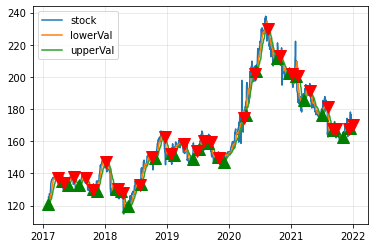

In [39]:
# Initializing the max_return to -INF 
max_return = -np.Inf
temp_retrun = -np.Inf
lower_level = 0
upper_level = 0

# Combinations we are checking : {[8,20],[8,21],[8,22],[9,20],[9,21],[9,22]}

for i in range(8,10):
  for j in range(20,23):
    print(' ')
    print("Lower Level:", i, " Upper Level:", j)
    temp_retrun = get_overall_return(prep_data, i,j)
    # Keep track of the max return like brute force 
    if temp_retrun > max_return:
      max_return = temp_retrun
      lower_level = i
      upper_level = j

print("\nLower Level:", lower_level, " Upper Level:", upper_level, " max_return:", max_return)

**After running 6 combinations, we get lowerVal = 9 and upperVal = 20 as our maximum return parameters. And the max return is 0.7264.**

# **4. Analysis** 

Analysis of Buy/Hold vs Momentum Trading Strategies When Implemented in 2022 and Their Comparison to S&P 500 Returns During that Time Period

### Momentum Trading analysis for Jan 1st 2022 - Nov 1st 2022

In [40]:
tickers_list = ['CLX','BLK','MS']
allocation_list = [0.3362, 0.4332, 0.2306]
InvestAmt = 100000
# CLX investment amount
stock1Allocation = allocation_list[0] * InvestAmt
# BLK investment amount 
stock2Allocation = allocation_list[1] * InvestAmt
# MS investment amount
stock3Allocation = allocation_list[2] * InvestAmt


In [41]:
# Get the data using previously created function called Get_data()
prep_data = Get_data(tickers_list[0], tickers_list[1], tickers_list[2], '12/03/2021', '11/02/2022', '1d')
prep_data.iloc[-1]

CLX    146.669998
BLK    652.000000
MS      83.720001
Name: 2022-11-01 00:00:00, dtype: float64

Add days as a column

In [42]:
# generate list of trading days
day = np.arange(1, len(prep_data) + 1) 
print(len(day))
prep_data['Day'] = day

230


#### Calculate the overall return of three stocks using momentum trading (9,20) strategy

stock1 return -0.025639896061788736
stock2 return -0.07891194735443852
stock3 return -0.28387661529590125
Overall_return: -0.10826673613715096


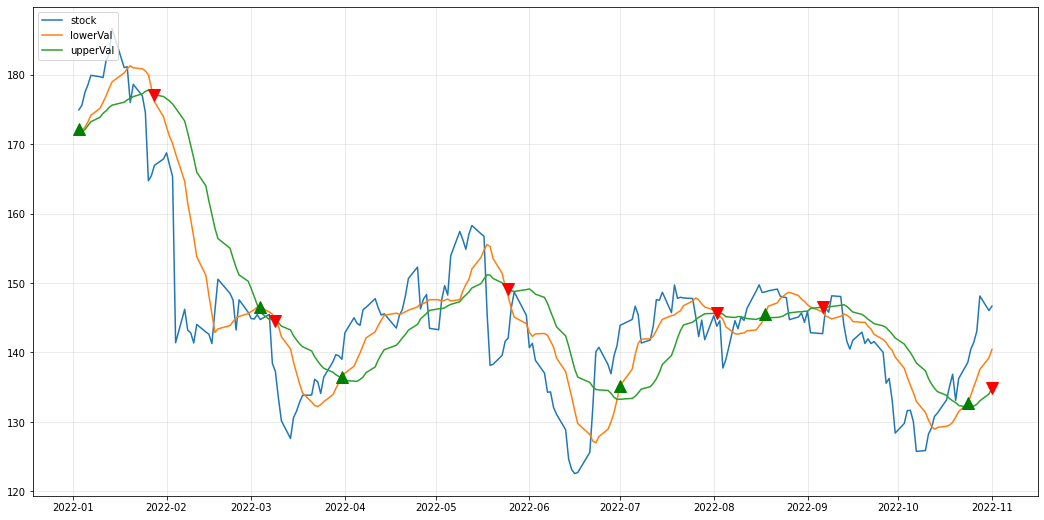

In [43]:
# Get the momentum trading return for 9 - 20 moving averages 
momentumTradingReturn =  get_overall_return(prep_data, 9,20)

Overall return from the momentum trading strategy is -0.1078

#### Get the stock positions each day of investment 

Get the individual stocks 

In [44]:
# Separate the 3 stocks
stock1 = prep_data[['Day', tickers_list[0]]].rename(columns = {tickers_list[0]: 'Close'})
stock2 = prep_data[['Day', tickers_list[1]]].rename(columns = {tickers_list[1]: 'Close'})#
stock3 = prep_data[['Day', tickers_list[2]]].rename(columns = {tickers_list[2]: 'Close'})

In [45]:
lowerVal = 9
upperVal = 20
stock1['lowerVal'] = stock1['Close'].rolling(lowerVal).mean().shift()
stock1['upperVal'] = stock1['Close'].rolling(upperVal).mean().shift()
stock1.dropna(inplace=True)
  # stock1.head(n=upperVal+1)

# Do the same for other two stocks 
stock2['lowerVal'] = stock2['Close'].rolling(lowerVal).mean().shift()
stock2['upperVal'] = stock2['Close'].rolling(upperVal).mean().shift()
stock2.dropna(inplace=True)
# print(stock2.head(n=upperVal+1))

stock3['lowerVal'] = stock3['Close'].rolling(lowerVal).mean().shift()
stock3['upperVal'] = stock3['Close'].rolling(upperVal).mean().shift()
stock3.dropna(inplace=True)
# print(stock3.head(n=upperVal+1))

stock1['logClose'] = np.log(stock1['Close'])
stock2['logClose'] = np.log(stock2['Close']) # price will always be positive, so this operation is well-defined
stock3['logClose'] = np.log(stock3['Close'])

stock1['return'] = stock1['logClose'].diff() # the difference will be positive or negative
stock2['return'] = stock2['logClose'].diff()
stock3['return'] = stock3['logClose'].diff()

In [46]:
# return on day one would be 0.0
stock1.iloc[0,5] = 0.0
stock2.iloc[0,5] = 0.0
stock3.iloc[0,5] = 0.0

stock1['invested'] = np.where(stock1['lowerVal'] > stock1['upperVal'], 1, 0)
stock2['invested'] = np.where(stock2['lowerVal'] > stock2['upperVal'], 1, 0)
stock3['invested'] = np.where(stock3['lowerVal'] > stock3['upperVal'], 1, 0)

#We want to buy on the day 1
stock1.iloc[0,6] = 1.0
stock2.iloc[0,6] = 1.0
stock3.iloc[0,6] = 1.0

In [47]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
stock1['signal'] = stock1['invested'].diff()
stock2['signal'] = stock2['invested'].diff()
stock3['signal'] = stock3['invested'].diff()

# Signal should be buy on day one 
stock1.iloc[0,7] = 1.0
stock2.iloc[0,7] = 1.0
stock3.iloc[0,7] = 1.0

# Signal should be sell on last day 
stock1.iloc[-1,7] = -1.0
stock2.iloc[-1,7] = -1.0
stock3.iloc[-1,7] = -1.0
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
stock1['system_return'] = stock1['invested'] * stock1['return']
stock2['system_return'] = stock2['invested'] * stock2['return']
stock3['system_return'] = stock3['invested'] * stock3['return']

In [48]:
stock2.head()

,Day,Close,lowerVal,upperVal,logClose,return,invested,signal,system_return
2022-01-03,21,911.729980,913.005547,913.620493,6.815344,0.000000,1,1.0,0.000000
2022-01-04,22,917.219971,914.609992,914.228491,6.821347,0.006003,1,0.0,0.006003
2022-01-05,23,891.770020,915.315545,915.254489,6.793208,-0.028139,1,0.0,-0.028139
2022-01-06,24,895.489990,913.118883,913.796991,6.797371,0.004163,0,-1.0,0.000000
2022-01-07,25,892.270020,911.071106,912.378491,6.793769,-0.003602,0,0.0,-0.000000


In [49]:
# Add a column called 'position' and set it to 0
stock1['position'] = 0
stock2['position'] = 0
stock3['position'] = 0

In [50]:
# For stock1, stock2, and stock3
# Here we are calculating  
for i in range(0, len(stock1)):
  mReturn1 = 0
  mReturn2 = 0
  mReturn3 = 0
  for j in range(0, i+1):
    # Access each row and system return column 
    mReturn1 += stock1.iloc[j, 8]
    mReturn2 += stock2.iloc[j, 8]
    mReturn3 += stock3.iloc[j, 8]
  # Access i'th raw and last column ('position')
  stock1.iloc[i,-1] = stock1Allocation*np.exp(mReturn1)
  stock2.iloc[i,-1] = stock2Allocation*np.exp(mReturn2)
  stock3.iloc[i,-1] = stock3Allocation*np.exp(mReturn3)
  

In [51]:
stock3.head(10)

,Day,Close,lowerVal,upperVal,logClose,return,invested,signal,system_return,position
2022-01-03,21,100.190002,98.537779,98.996500,4.607068,0.000000,1,1.0,0.000000,23060.000000
2022-01-04,22,104.260002,99.073335,99.095501,4.646888,0.039819,0,-1.0,0.000000,23060.000000
2022-01-05,23,101.680000,99.794446,99.345001,4.621831,-0.025057,1,1.0,-0.025057,22489.360819
2022-01-06,24,103.419998,100.170002,99.304001,4.638798,0.016968,1,0.0,0.016968,22874.209754
2022-01-07,25,104.050003,100.623335,99.412501,4.644872,0.006073,1,0.0,0.006073,23013.552860
2022-01-10,26,104.129997,101.028891,99.586001,4.645640,0.000769,1,0.0,0.000769,23031.245803
2022-01-11,27,105.919998,101.491113,99.871001,4.662684,0.017044,1,0.0,0.017044,23427.154304
2022-01-12,28,103.050003,102.290001,100.308501,4.635214,-0.027470,1,0.0,-0.027470,22792.375040
2022-01-13,29,102.550003,102.762223,100.520001,4.630351,-0.004864,1,0.0,-0.004864,22681.786130
2022-01-14,30,98.879997,103.250001,100.676001,4.593907,-0.036444,1,0.0,-0.036444,21870.062248


#### Create a table that shows the value of each position in your portfolio on the first day of each month

**GetFirstDayOfMonth function**:
- This function creates a column 'firstDayofMonth' and sets it to 0 by default 
- Then we find first date of each month and set corresponding 'firstDayofMonth' column to 1. 

In [52]:
def GetFirstDayOfMonth(stock):
  stock['firstDayOfMonth'] = 0
  stock.loc[stock.loc['2022-01'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-02'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-03'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-04'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-05'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-06'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-07'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-08'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-09'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-10'].index.to_series().min(), 'firstDayOfMonth'] = 1
  stock.loc[stock.loc['2022-11'].index.to_series().min(), 'firstDayOfMonth'] = 1

In [53]:
# Call GetFirstDayOfMonth for each stock 
GetFirstDayOfMonth(stock1)
GetFirstDayOfMonth(stock2)
GetFirstDayOfMonth(stock3)

**Following table shows the stock value position for each of the stock on the first day of each month** 

In [54]:
# print(stock1[stock1['firstDayOfMonth'].isin([1])])
# print(stock2[stock1['firstDayOfMonth'].isin([1])])
# print(stock3[stock1['firstDayOfMonth'].isin([1])])

print('Stock1:\n',stock1[stock1['firstDayOfMonth'].isin([1])]['position'], '\n')
print('Stock2:\n',stock2[stock2['firstDayOfMonth'].isin([1])]['position'], '\n')
print('Stock3:\n',stock3[stock3['firstDayOfMonth'].isin([1])]['position'])

Stock1:
 2022-01-03    33620.000000
2022-02-01    31801.873172
2022-03-01    31801.873172
2022-04-01    30991.729814
2022-05-02    31089.371652
2022-06-01    30724.841242
2022-07-01    31361.218621
2022-08-01    31664.151745
2022-09-01    31080.459939
2022-10-03    30430.733912
2022-11-01    32757.986694
Name: position, dtype: float64 

Stock2:
 2022-01-03    43320.000000
2022-02-01    42371.621065
2022-03-01    42371.621065
2022-04-01    43670.223276
2022-05-02    40605.545604
2022-06-01    40085.443652
2022-07-01    35549.576485
2022-08-01    37170.182818
2022-09-01    37419.316435
2022-10-03    37419.316435
2022-11-01    39901.534441
Name: position, dtype: float64 

Stock3:
 2022-01-03    23060.000000
2022-02-01    21865.639434
2022-03-01    20253.879341
2022-04-01    18699.691125
2022-05-02    18240.853811
2022-06-01    17934.906058
2022-07-01    15862.896975
2022-08-01    17325.769393
2022-09-01    17395.823271
2022-10-03    16217.929624
2022-11-01    16513.805251
Name: position, 

**Following table shows the portfolio position for all on the first day of each month**

In [55]:
# Get an aggregate dataframe of addition of all positions 
momentumTradingPortfolioPosition = stock1[stock1['firstDayOfMonth'].isin([1])]['position'] + stock2[stock2['firstDayOfMonth'].isin([1])]['position'] + stock3[stock3['firstDayOfMonth'].isin([1])]['position']
momentumTradingPortfolioPosition

2022-01-03    100000.000000
2022-02-01     96039.133671
2022-03-01     94427.373578
2022-04-01     93361.644215
2022-05-02     89935.771068
2022-06-01     88745.190952
2022-07-01     82773.692081
2022-08-01     86160.103957
2022-09-01     85895.599645
2022-10-03     84067.979971
2022-11-01     89173.326386
Name: position, dtype: float64

### Buy and Hold Strategy Analysis 
Calculating returns
The function .diff() calculates the difference between the current row and previous row. That's why there is a NaN at the beginning of the dataframe when we create the jpm['return'] column.

We want to calculate the returns using .diff(), so we need to take the log of the close values. jpm['return'] will be the 'buy and hold' return (i.e., we will buy in the first day and sell in the last day, regardless of what's happening in the market). And later, we will make a variable for our system, the momentum trading algorithm!

In [56]:
tickers_list = ['CLX','BLK','MS']
allocation_list = [0.3362, 0.4332, 0.2306]
InvestAmt = 100000
# CLX investment amount
stock1Allocation = allocation_list[0] * InvestAmt
# BLK investment amount 
stock2Allocation = allocation_list[1] * InvestAmt
# MS investment amount
stock3Allocation = allocation_list[2] * InvestAmt

In [57]:
prep_data = Get_data(tickers_list[0], tickers_list[1], tickers_list[2], '01/01/2022', '11/02/2022', '1d')
print(prep_data.iloc[-1])

day = np.arange(1, len(prep_data) + 1) #generate list of trading days
print(len(day))
prep_data['Day'] = day

CLX    146.669998
BLK    652.000000
MS      83.720001
Name: 2022-11-01 00:00:00, dtype: float64
210


**GetOverallRerurnBuyAndHold function definition**: 
- This function basically calculates the return for buy and hold strategy 
- Similar to calculating momentum trading return, we add logclose column by taking log of 'close' values
- Get the return as log diff with respect to the previous day 
- Return on day one would be 0.0
- Return the overall-return using weighted multiplication of returns with stocks allocation 

In [58]:
def GetOverallRerurnBuyAndHold(prep_data):
  # separate the stock data into individual data frames 
  # To write a robust and dynamic code, using stock1 .... etc, instead of the names themselves. 
  stock1 = prep_data[['Day', tickers_list[0]]].rename(columns = {tickers_list[0]: 'Close'})
  stock2 = prep_data[['Day', tickers_list[1]]].rename(columns = {tickers_list[1]: 'Close'})
  stock3 = prep_data[['Day', tickers_list[2]]].rename(columns = {tickers_list[2]: 'Close'})
  
  stock1['logClose'] = np.log(stock1['Close'])
  stock2['logClose'] = np.log(stock2['Close']) # price will always be positive, so this operation is well-defined
  stock3['logClose'] = np.log(stock3['Close'])

  stock1['return'] = stock1['logClose'].diff() # the difference will be positive or negative
  stock2['return'] = stock2['logClose'].diff()
  stock3['return'] = stock3['logClose'].diff()

  stock1.iloc[0,3] = 0.0
  stock2.iloc[0,3] = 0.0
  stock3.iloc[0,3] = 0.0

  print(tickers_list[0]," return using buy and hold: ", np.exp(np.sum(stock1['return'])) -1)
  print(tickers_list[1]," return using buy and hold: ", np.exp(np.sum(stock2['return'])) -1)
  print(tickers_list[2]," return using buy and hold: ", np.exp(np.sum(stock3['return'])) -1)

  overall_return = allocation_list[0]*(np.exp(np.sum(stock1['return'])) -1) + allocation_list[1]*(np.exp(np.sum(stock2['return'])) -1) + allocation_list[2]*(np.exp(np.sum(stock3['return'])) -1)
  print("Overall return on buy and hold strategy: ",overall_return)
  return overall_return

#### Get the overall return on buy and hold strategy 

In [59]:
# Get buy and hold return 
buynHoldOverAllReturn = GetOverallRerurnBuyAndHold(prep_data)

CLX  return using buy and hold:  -0.16155030978143115
BLK  return using buy and hold:  -0.28487598963808825
MS  return using buy and hold:  -0.16438767161758716
Overall return on buy and hold strategy:  -0.21562928993475255


#### Create a table that shows the value of each position in your portfolio on the first day of each month

In [60]:
stock1 = prep_data[['Day', tickers_list[0]]].rename(columns = {tickers_list[0]: 'Close'})
stock2 = prep_data[['Day', tickers_list[1]]].rename(columns = {tickers_list[1]: 'Close'})
stock3 = prep_data[['Day', tickers_list[2]]].rename(columns = {tickers_list[2]: 'Close'})


In [61]:
# Get the first day stock price
stock1_firstDayPrice = stock1.iloc[0,1]
stock2_firstDayPrice = stock2.iloc[0,1]
stock3_firstDayPrice = stock3.iloc[0,1]
print(stock1_firstDayPrice)
print(stock2_firstDayPrice)
print(stock3_firstDayPrice)

# Get the no. of shares of each stock 
stock1_NoOfShares = stock1Allocation / stock1_firstDayPrice
stock2_NoOfShares = stock2Allocation / stock2_firstDayPrice
stock3_NoOfShares = stock3Allocation / stock3_firstDayPrice
print(stock1_NoOfShares)
print(stock2_NoOfShares)
print(stock3_NoOfShares)

174.92999267578125
911.72998046875
100.19000244140625
192.19117022609143
47.514067682328246
230.16268527876417


In [62]:
# Calculating portfolio values on each day for the 3 stocks in our portfolio
stock1['position'] = stock1['Close']*stock1_NoOfShares
stock2['position'] = stock2['Close']*stock2_NoOfShares
stock3['position'] = stock3['Close']*stock3_NoOfShares

In [63]:
GetFirstDayOfMonth(stock1)
GetFirstDayOfMonth(stock2)
GetFirstDayOfMonth(stock3)

**Following table shows the stock value position for each of the stock on the first day of each month**

In [64]:
print('Stock1:\n',stock1[stock1['firstDayOfMonth'].isin([1])]['position'], '\n')
print('Stock2:\n',stock2[stock1['firstDayOfMonth'].isin([1])]['position'], '\n')
print('Stock3:\n',stock3[stock1['firstDayOfMonth'].isin([1])]['position'])

Stock1:
 2022-01-03    33620.000000
2022-02-01    32430.339120
2022-03-01    27844.657681
2022-04-01    27450.665195
2022-05-02    27537.150635
2022-06-01    27041.297064
2022-07-01    27656.308222
2022-08-01    27923.453832
2022-09-01    28040.690563
2022-10-03    24942.569837
2022-11-01    28188.678585
Name: position, dtype: float64 

Stock2:
 2022-01-03    43320.000000
2022-02-01    39244.244782
2022-03-01    33963.530604
2022-04-01    36574.429203
2022-05-02    29686.788908
2022-06-01    31383.517309
2022-07-01    29301.926120
2022-08-01    31900.470597
2022-09-01    31589.726739
2022-10-03    27212.255451
2022-11-01    30979.172129
Name: position, dtype: float64 

Stock3:
 2022-01-03    23060.000000
2022-02-01    23925.410432
2022-03-01    20169.155479
2022-04-01    20021.851501
2022-05-02    18864.133475
2022-06-01    19563.828249
2022-07-01    17664.986095
2022-08-01    19354.379362
2022-09-01    19833.118169
2022-10-03    18500.476011
2022-11-01    19269.220292
Name: position, 

**Following table shows the portfolio position for all on the first day of each month**

In [65]:
# Get an aggregate dataframe of addition of all positions 
buyNHoldportfolioPosition = stock1[stock1['firstDayOfMonth'].isin([1])]['position'] + stock2[stock2['firstDayOfMonth'].isin([1])]['position'] + stock3[stock3['firstDayOfMonth'].isin([1])]['position']
buyNHoldportfolioPosition

2022-01-03    100000.000000
2022-02-01     95599.994334
2022-03-01     81977.343764
2022-04-01     84046.945899
2022-05-02     76088.073018
2022-06-01     77988.642622
2022-07-01     74623.220437
2022-08-01     79178.303791
2022-09-01     79463.535471
2022-10-03     70655.301299
2022-11-01     78437.071007
Name: position, dtype: float64

### S&P Analysis 

#### Get the data 

In [66]:
# S&P 500 Calculations
tickers_list = ['^GSPC']
InvestAmt = 100000

In [67]:
# pull historical price data for each stocks
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2022',end_date='11/02/2022',interval='1d') for ticker in tickers_list}

Prep the data to get stock's closing value

In [68]:
prep_data = pd.DataFrame(dow_prices[tickers_list[0]]['close']).rename(columns = {'close':tickers_list[0]})

In [69]:
# Generate list of trading days
day = np.arange(1, len(prep_data) + 1)
print(len(day))
prep_data['Day'] = day

210


In [70]:
prep_data.head()

,^GSPC,Day
2022-01-03,4796.560059,1
2022-01-04,4793.540039,2
2022-01-05,4700.580078,3
2022-01-06,4696.049805,4
2022-01-07,4677.029785,5


In [71]:
# Get the stock and name the column as 'close'
stock_S_P = prep_data[['Day', tickers_list[0]]].rename(columns = {tickers_list[0]: 'Close'})

#### Calculate the return from S&P 500 stock using buy and hold strategy 

In [72]:
stock_S_P['logClose'] = np.log(stock_S_P['Close'])
stock_S_P['return'] = stock_S_P['logClose'].diff() # the difference will be positive or negative
stock_S_P.iloc[0,3] = 0.0

In [73]:
print(tickers_list[0],"S&P500 return using buy and hold: ", np.exp(np.sum(stock_S_P['return'])) -1)
s_p_overallreturn = np.exp(np.sum(stock_S_P['return'])) -1

^GSPC S&P500 return using buy and hold:  -0.19606967273400966


S&P 500 return is -**19.606**

#### Create a table that shows the value of each position in your S&P 500 stock on the first day of each month

In [74]:
# Get the first day closing value of S&P stock 
stock_S_P_firstDayPrice = stock_S_P.iloc[0,1]
stock_S_P_firstDayPrice

4796.56005859375

In [75]:
# Using first day closing value and total invest amount, get the no. of shares of S&P 
stock_S_P_NoOfShares = InvestAmt / stock_S_P_firstDayPrice
stock_S_P_NoOfShares

20.848274342116312

In [76]:
# Add position column that will show current invested amount on daily basis 
stock_S_P['position'] = stock_S_P['Close']*stock_S_P_NoOfShares

In [77]:
stock_S_P.head()

,Day,Close,logClose,return,position
2022-01-03,1,4796.560059,8.475654,0.000000,100000.000000
2022-01-04,2,4793.540039,8.475024,-0.000630,99937.037804
2022-01-05,3,4700.580078,8.455441,-0.019583,97998.983036
2022-01-06,4,4696.049805,8.454477,-0.000964,97904.534652
2022-01-07,5,4677.029785,8.450419,-0.004058,97508.000067


In [78]:
# The function add a column called 'firstDayOfMonth' which is 1 for all first days of the month and 0 otherwise
GetFirstDayOfMonth(stock_S_P)

**Following table shows the stock value position for each of the stock on the first day of each month**

In [79]:
# print all stock positions on each first day of the month 
s_p_porfolioPosition = stock_S_P[stock_S_P['firstDayOfMonth'].isin([1])]
print(stock_S_P[stock_S_P['firstDayOfMonth'].isin([1])]['position'])

2022-01-03    100000.000000
2022-02-01     94787.514042
2022-03-01     89778.084982
2022-04-01     94773.333551
2022-05-02     86632.499793
2022-06-01     85503.567773
2022-07-01     79751.530918
2022-08-01     85866.325711
2022-09-01     82701.979110
2022-10-03     76688.916363
2022-11-01     80393.032727
Name: position, dtype: float64


### Comparison between returns of momentum trading, buy and hold, and S&P500 stock

In [80]:
print('Buy and hold portfolio return:\t\t', buynHoldOverAllReturn)
print('Momentum trading portfolio return:\t', momentumTradingReturn)
print('S&P 500 portfolio return:\t\t', s_p_overallreturn)

Buy and hold portfolio return:		 -0.21562928993475255
Momentum trading portfolio return:	 -0.10826673613715096
S&P 500 portfolio return:		 -0.19606967273400966


Momentum trading strategy is giving the most return of -10 percent. 

### Comparison between the portfolio position of momentum trading, buy and hold, and S&P500 *stock*

In [81]:

print("Momentum trading portfolio monthly position\n")
print(momentumTradingPortfolioPosition)
print('\n')
print("Buy and hold portfolio monthly position\n")
print(buyNHoldportfolioPosition)
print('\n')
print("S&P 500 trading portfolio monthly position\n")
print(s_p_porfolioPosition['position'])

Momentum trading portfolio monthly position

2022-01-03    100000.000000
2022-02-01     96039.133671
2022-03-01     94427.373578
2022-04-01     93361.644215
2022-05-02     89935.771068
2022-06-01     88745.190952
2022-07-01     82773.692081
2022-08-01     86160.103957
2022-09-01     85895.599645
2022-10-03     84067.979971
2022-11-01     89173.326386
Name: position, dtype: float64


Buy and hold portfolio monthly position

2022-01-03    100000.000000
2022-02-01     95599.994334
2022-03-01     81977.343764
2022-04-01     84046.945899
2022-05-02     76088.073018
2022-06-01     77988.642622
2022-07-01     74623.220437
2022-08-01     79178.303791
2022-09-01     79463.535471
2022-10-03     70655.301299
2022-11-01     78437.071007
Name: position, dtype: float64


S&P 500 trading portfolio monthly position

2022-01-03    100000.000000
2022-02-01     94787.514042
2022-03-01     89778.084982
2022-04-01     94773.333551
2022-05-02     86632.499793
2022-06-01     85503.567773
2022-07-01     79751

# **5.  Conclusion**

After choosing the nine stocks for our portfolio and running our MPT model, the appropriate allocation we determined was:

   1) Stock #1: CLX (Clorox Co.) @ 34% (rounded)

  2) Stock #2: MS (Morgan Stanley) @ 23% (rounded)

  3) Stock #3: BLK (BlackRock, Inc.) @ 43% (rounded) 

We felt that this allocation maximized our return, while also accounting for the level of risk tolerance we were willing to accept. We had to find the balance of maximizing profits, while considering the risk that we were comfortable with. We chose:

Risk Level = 0.000182

Based on our allocation from the MPT model, our momentum trading strategy that provided the maximum return was, moving averages of 9 days and 20 days. This provided a maximum return percentage of 72.64%.

In our analysis, when comparing which strategy would be optimalgiven $100,000 to invest with in 2022, the momentum trading strategy appeared optimal. The momentum trading strategy was optimal because it was the strategy where we lost the least amount of our investment. The following strategies provided the following return percentages:

  Momentum Trading Strategy: -10.83%

  Investing in the S&P 500 Strategy: -19.61%

  Buy & Hold Strategy: -21.56%

## ***Closing Thoughts:***



*   Models can be useful tools to help with investment decision making, but people ultimately make the final decision. The models we explored helped us make informed decisions, but we had to choose which one to implement and move forward with.

    - Models cannot fully eliminate the human decision-making process 

    - Models help aid in making better, more informed decisions

*   The momentum trading strategy can assist with predictive analysis, but there is no tool or model that can predict future outcomes with 100% accuracy. There are many external factors that can alter and change the market at any time.

*   Based on the nine stocks chosen, the MPT model helped us select the optimal three stocks that not only maximized our reward potential, but also kept us relatively risk neutral. We did lean riskier in our stock selection, but we wanted to capture the reward potential.

    - BlackRock stock = a risky stock, but potentially very rewarding. The financial industry tends to be favorable in the long-run and volatile short-term. Potential high returns in the short run, but higher risk too.

    - Clorox Co. = a misleading stock, and more overvalued than the model predicted. We might have chosen this stock per the model based on the COVID-19 impact, but now that we're at the tail end of the pandemic, this stock's value will likely decrease.

    - Morgan Stanley = a safer, less volatile stock that helps offset risk on BlackRock and Clorox. This is a good long-term investment due to the industry and company's history.

*   It was not ideal or wise to invest in 2022, as all three strategies resulted in losses. However, the models helped us choose the strategy with the least amount of loss.

*   Since each strategy resulted in lost returns, we should try and sell at the least lost amount or hold for a potential positive return. Since two of the stocks in our portfolio are from the investment sector, we may want to hold, due to financial stocks performing better in the long-run. However, the risk could be that we lose more of our investment. This is exactly what investing in the stock market entails and why it is risky to invest.

*   If time permitted, it would be interesting to see if we could model a positive return with a different portfolio mix (choosing three different stocks from our nine) at a different risk level. 


**Team Member Contribution:**

*Kevin Connolly*: Selected energy stocks, lead the section 1 stock data integration/visualization, wrote the MPT section 2, assembled final notebook

*Tushar Ghule*:

*Keno Hunter*: 

*Timothy Wheeler*: 

*Jonathan Width*:
